<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/main/Impl%C3%A9mentation_SVM_dans_Python_From_Scratch_Guide_%C3%A9tape_par_%C3%A9tape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP: Implementation SVM dans Python 


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 


Lien Github:
https://github.com/BillTanekeu/TP-TPE-INF-3236-Groupe-8


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**chargement du jeu de données**

In [2]:
from google.colab import files
import io
uploader = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
data = pd.read_csv(io.BytesIO(uploader["Social_Network_Ads.csv"]))


In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [12]:
X = data.iloc[: , [0,1]].values
Y = data.iloc[:,2].values

Division de X et Y en jeu de train et de test

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.25 , random_state = 0 ) 

Normalisation des données 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Model SVM sur les données de train

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf' , random_state = 0)
classifier.fit(X_train , Y_train)

SVC(random_state=0)

Prédiction sur le jeu de test

In [21]:
Y_pred = classifier.predict(X_test )

In [22]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

Matrice de confusion

In [23]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(Y_test , Y_pred)
print(cm)
accuracy_score(Y_test , Y_pred)

[[64  4]
 [ 3 29]]


0.93

Visualistion des résultats du jeu de test

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


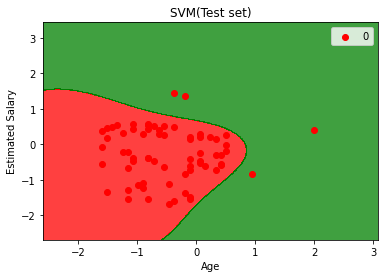

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


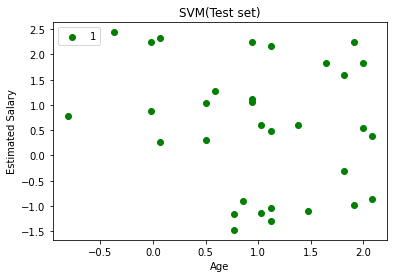

In [24]:
from matplotlib.colors import ListedColormap
X_set , Y_set = X_test , Y_test
X1 , X2 =  np.meshgrid(np.arange(start = X_set[: , 0].min()-1 , stop = X_set[:,0].max()+1 , step = 0.01) , 
                       np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max()+1 , step = 0.01))
plt.contourf(X1 , X2 , classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75 , cmap = ListedColormap(('red' , 'green' )))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())
for i , j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set==j , 0] , X_set[Y_set == j , 1] , c = ListedColormap(('red', 'green'))(i) , label = j)
  plt.title('SVM(Test set)')
  plt.xlabel('Age') 
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()
